<a href="https://colab.research.google.com/github/dtabuena/Data_Explore/blob/main/DG_Type_II_Clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install openpyxl
!pip install XlsxWriter
!pip install pingouin
from IPython.display import clear_output
import pandas as pd
import os
import numpy as np
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

clear_output()

In [ ]:
link = 'https://www.dropbox.com/sh/5jheuv2n7pmfzw9/AABpo1PU8v33CR3CCxq3459ba?dl=0'
xl_to_analyze = 'DG Type I GC main parameters.xlsx'

my_drop_folder = 'my_drop_folder'
zipped_file_path = "/content/"+my_drop_folder + ".zip"
unzipped_file_path = "/content/"+my_drop_folder
if not( os.path.exists(zipped_file_path)):
    !wget -O $zipped_file_path $link    # download with new name
!echo A | unzip $zipped_file_path -d $unzipped_file_path 
print(unzipped_file_path)
my_df_dict  = pd.read_excel('my_drop_folder/'+xl_to_analyze, engine='openpyxl',index_col=None,sheet_name=None)
for k in my_df_dict.keys():
    print(k)


--2022-09-19 18:34:20--  https://www.dropbox.com/sh/5jheuv2n7pmfzw9/AABpo1PU8v33CR3CCxq3459ba?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /sh/raw/5jheuv2n7pmfzw9/AABpo1PU8v33CR3CCxq3459ba [following]
--2022-09-19 18:34:21--  https://www.dropbox.com/sh/raw/5jheuv2n7pmfzw9/AABpo1PU8v33CR3CCxq3459ba
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce69af512da6d96ad477976b4a8.dl.dropboxusercontent.com/zip_download_get/BQoJnGnFdKl9Boatv4KFaxVlALG1HOsmgwInYQ86wdowINAmW79KMuP6JH96djYOCA6FEgRibh-gTJY2GxlVY_SE5vyQbV7dct7flZdurduuMQ# [following]
--2022-09-19 18:34:22--  https://uce69af512da6d96ad477976b4a8.dl.dropboxusercontent.com/zip_download_get/BQoJnGnFdKl9Boatv4KFaxVlALG1HOsmgwInYQ86wdowINAmW79KMuP6JH96djYOCA6FEgRibh-gTJY2GxlVY_SE5vyQ

In [ ]:
for k in my_df_dict.keys():
    df = my_df_dict[k]
    df['type'] = k
df_list = [my_df_dict[k] for k in my_df_dict.keys()]
full_df = pd.concat(df_list,ignore_index=True)
display(full_df)

,Cm,Rin,RMP,I-F Gain,Rheobase,Spike Latency,Max Firing rate,AP threshold,fAHP(1),sAHP,AP width,AP amp,Adaptation Ratio,AP rise time,type
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E3 Type I 9mo
1,57.29,362.3619,-75.3,0.285,40.0,129.45100,56.0,-37.375992,9.670423,3.331250,0.681740,77.079361,2.426702,0.492544,E3 Type I 9mo
2,40.69,636.7572,-83.6,0.375,30.0,97.94500,65.0,-42.479099,10.106504,4.341060,0.719224,75.468605,2.406130,0.490961,E3 Type I 9mo
3,43.61,486.6163,-78.3,0.350,40.0,123.38500,54.0,-37.414913,11.321048,2.011740,0.835531,73.578247,1.000000,0.597308,E3 Type I 9mo
4,58.87,416.4786,-81.6,0.195,50.0,151.33600,28.0,-32.799431,8.818250,1.281680,0.829232,71.221062,3.752475,0.587538,E3 Type I 9mo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,37.24,408.5423,-83.2,0.245,50.0,144.84395,23.0,-35.298100,11.845135,1.103020,0.681738,75.428673,2.442553,0.536926,E4 Type I 19mo
63,36.58,494.1668,-83.3,0.280,30.0,113.52914,47.0,-37.571000,6.797871,1.430870,0.702841,72.330559,2.561644,0.552990,E4 Type I 19mo
64,44.56,438.4460,-81.6,0.195,40.0,155.84644,15.0,-21.109900,15.034523,2.734080,0.628727,53.122860,1.672566,0.593329,E4 Type I 19mo
65,25.17,528.4416,-76.0,0.220,30.0,102.90958,20.0,-35.399700,10.541903,1.272910,0.582129,69.365799,3.882353,0.547255,E4 Type I 19mo


In [ ]:
for r in full_df.index:
    if full_df.loc[r,'AP amp'] <60:
        full_df.at[r,'AP amp'] = np.nan

In [ ]:
labeling = ['Cell','type','extra'] # non numerical data 
numericals = [c for c in full_df.columns if c not in labeling ]

full_df_norm = full_df.copy()
mean_dict = {}
sd_dict = {}

for c in full_df_norm.columns:
    if c not in labeling:
        col_mean = np.mean(full_df_norm[c])
        col_sd = np.std(full_df_norm[c])
        mean_dict[c] = col_mean
        sd_dict[c] = col_sd
        full_df_norm[c] = (full_df_norm[c] - col_mean)/col_sd


null_check = pd.isna(full_df_norm)
incomplete =[]
for r in full_df_norm.index:
    vals = np.array(null_check.loc[r,numericals])
    bad = any(vals)
    if bad:
        incomplete.append(r)
# print(incomplete)

complete = [c for c in  full_df_norm.index if c not in incomplete]
full_df_no_null = full_df_norm.loc[complete].copy()
display(full_df_no_null.head())



data_X = full_df_no_null[numericals].to_numpy()
data_X.shape
# pca = PCA(n_components=min(data_X.shape))
# data_X_enc = pca.fit_transform(data_X)
# plt.plot(1-np.cumsum(pca.explained_variance_ratio_))
# pca = PCA(n_components=5)
# data_X_enc = pca.fit_transform(data_X)
# print(data_X_enc.shape)
# print('Var exp:' ,sum(pca.explained_variance_ratio_))
# data_X_reduced = pca.inverse_transform(data_X_enc)

data_for_fit = data_X

,Cm,Rin,RMP,I-F Gain,Rheobase,Spike Latency,Max Firing rate,AP threshold,fAHP(1),sAHP,AP width,AP amp,Adaptation Ratio,AP rise time,type
1,1.412910,-1.139299,1.102157,0.048830,0.026570,-0.239773,1.124591,-0.218878,0.208480,1.034963,-0.191804,1.067140,0.177376,-0.759136,E3 Type I 9mo
2,-0.634054,2.370397,-0.954579,1.113692,-0.810385,-1.538210,1.742463,-1.447447,0.382135,1.841159,0.306020,0.733054,0.161855,-0.790127,E3 Type I 9mo
3,-0.273985,0.449997,0.358759,0.817897,0.026570,-0.489768,0.987287,-0.228248,0.865786,-0.018485,1.850723,0.340976,-0.899010,1.292290,E3 Type I 9mo
4,1.607741,-0.447111,-0.458980,-1.016033,0.863525,0.662159,-0.797675,0.882925,-0.130869,-0.601339,1.767058,-0.147926,1.177615,1.100971,E3 Type I 9mo
5,0.796355,-0.586217,1.349956,-0.838556,1.700481,1.770482,-0.454413,0.341678,-0.509348,0.238811,0.483835,1.027285,-0.664356,0.097021,E3 Type I 9mo


In [ ]:


type_list = list(full_df_no_null['type'])
uniq_types = list(set(type_list))
uniq_types.sort()
print(uniq_types)
num_t = len(uniq_types)
type_num = [ uniq_types.index(t) for t in type_list]

colors = plt.cm.viridis(np.linspace(0,1,num_t))
alpha = .4
colors = [[0, 0, 0, 1], [0, 0, 0, alpha],
          [1, 0, 1, 1], [1, 0, 1, alpha], 
          [0, .8, .8, 1], [0, .8, .8, alpha]]

list_colors = [colors[i] for i in type_num ]

fig_opt = {'dpi': 300, 'format':'png','bbox_inches':'tight'}

['E3 Type I 19mo', 'E3 Type I 9mo', 'E4 Type I 19mo', 'E4 Type I 9mo']


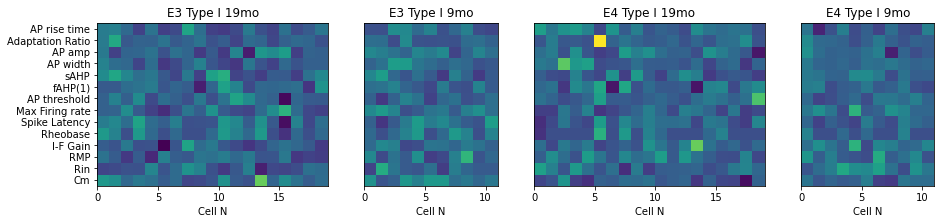

In [ ]:
### raw_data_map 
counts = [np.sum( [tt==t for tt in type_list]) for t in uniq_types ]
fig, ax = plt.subplots(1,num_t,figsize = [15,3],gridspec_kw={'width_ratios': counts})


data_X_min = np.min(data_for_fit)
data_X_max = np.max(data_for_fit)

for ti in range(num_t):
    t = uniq_types[ti]
    t_colr = colors[ti]
    is_type = [ind for ind in range(len(type_num)) if type_num[ind]==ti]

    ax[ti].pcolor(data_for_fit.T[:,is_type], vmin=data_X_min, vmax=data_X_max)
    ax[ti].set_yticks(np.arange(len(numericals))+0.5)
    if ti ==0 : ax[ti].set_yticklabels(numericals,rotation=0)
    else:  ax[ti].get_yaxis().set_visible(False)
    ax[ti].set_xlabel('Cell N')
    ax[ti].title.set_text(t)
    # plt.clim(data_X_min,data_X_max) 


    start = min(is_type)+3 / len(is_type)
    stop = max(is_type)-3 / len(is_type)

    # ax[ti].plot([start, stop], [0.1, 0.1,], transform=ax[ti].transAxes,color = 'k')

plt.show()
fig.savefig('Normalized_Vals_split.'+fig_opt['format'],**fig_opt)

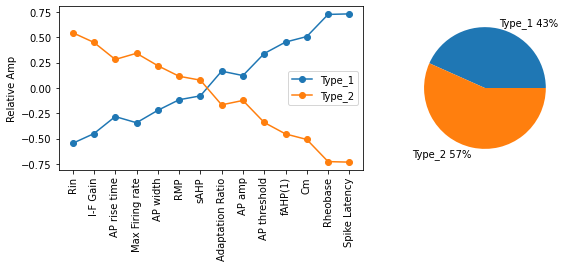

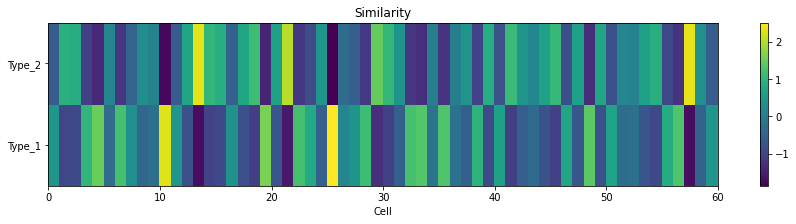

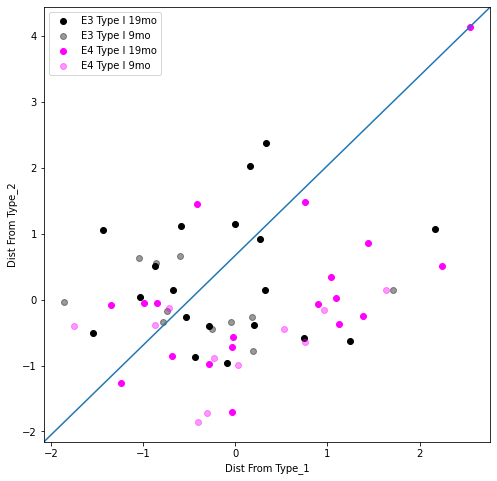

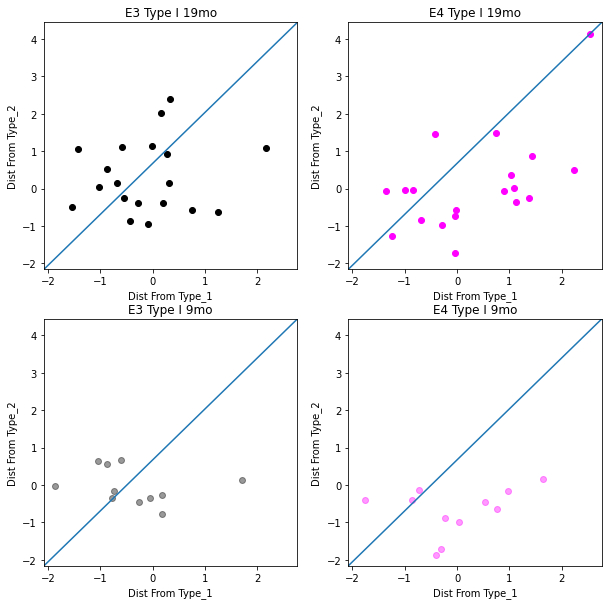

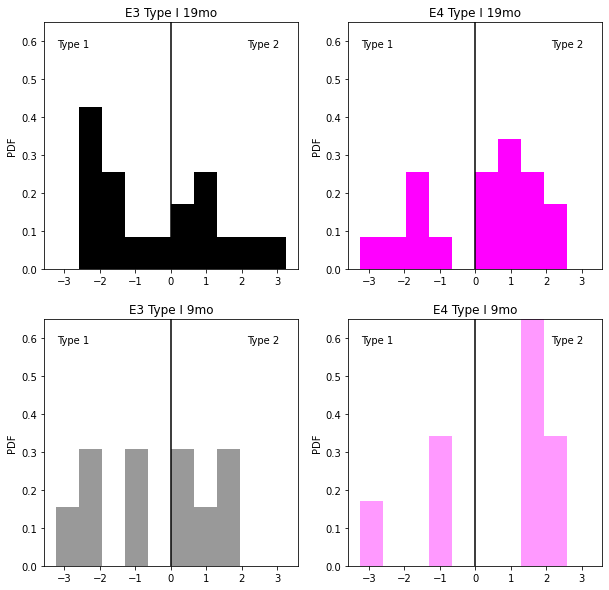

In [ ]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=2, random_state=42).fit(data_for_fit)
centers = kmeans.cluster_centers_.T
distances = kmeans.transform(data_for_fit)

rel_centers = (centers.T - np.mean(centers.T,axis = 0)).T

new_cent_order = np.argsort(centers[:,0]).tolist()
fig, ax = plt.subplots(1,2,figsize = [9,3], gridspec_kw={'width_ratios': [2, 1]} )
ax[0].plot(rel_centers[new_cent_order,:],'-o')
ax[0].legend(['Type_1', 'Type_2'])
sorted_numericals = [numericals[i] for i in new_cent_order]
ax[0].set_xticks(np.arange(len(numericals)))
ax[0].set_xticklabels(sorted_numericals,rotation=90)
ax[0].set_ylabel('Relative Amp')
labels = kmeans.labels_ 
rel_counts = [np.mean( l == labels ) for l in range(2)]
# print(counts)
ax[1].pie( rel_counts, labels=['Type_1 '+str(round(rel_counts[0]*100))+'%', 'Type_2 '+str(round(rel_counts[1]*100))+'%']  )
fig.savefig('Clusters.'+fig_opt['format'],**fig_opt)


total_D = np.tile(np.sum(distances,axis=1),[2,1]).T
closeness = np.log(total_D/distances)
closeness = (closeness - np.mean(closeness,axis=0)) / (np.std(closeness,axis=0))  
distances_norm = (distances - np.mean(distances,axis=0)) / (np.std(distances,axis=0))

fig, ax = plt.subplots(1,figsize = [15,3])
c = ax.pcolor(closeness.T)
ax.set_xlabel('Cell')
ax.set_yticks(np.arange(2)+0.5)
ax.set_yticklabels(['Type_1', 'Type_2'])
ax.title.set_text('Similarity')
fig.colorbar(c, ax=ax)
fig.savefig('Cells_in_Clusters.'+fig_opt['format'],**fig_opt)

fig, ax = plt.subplots(1,figsize = [8,8])
for ti in range(num_t):
    t = uniq_types[ti]
    t_colr = colors[ti]
    is_type = [ind for ind in range(len(type_num)) if type_num[ind]==ti]
    ax.scatter(distances_norm[is_type,0],distances_norm[is_type,1],color=t_colr, label=t)
ax.legend()
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('Dist From Type_1')
ax.set_ylabel('Dist From Type_2')
ax.plot([0, 1], [0, 1], transform=ax.transAxes)
comb_xlim = ax.get_xlim()
comb_ylim = ax.get_ylim()
fig.savefig('GenoType_dist.'+fig_opt['format'],**fig_opt)

#### separate #####
fig, axs = plt.subplots(2,2,figsize = [10,10])
axs = axs.T.flatten()
for ti in range(num_t):
    t = uniq_types[ti]
    t_colr = colors[ti]
    is_type = [ind for ind in range(len(type_num)) if type_num[ind]==ti]
    axs[ti].scatter(distances_norm[is_type,0],distances_norm[is_type,1],color=t_colr, label=t)
    axs[ti].set_xlabel('Dist From Type_1')
    axs[ti].set_ylabel('Dist From Type_2')
    axs[ti].plot([0, 1], [0, 1], transform=axs[ti].transAxes)
    axs[ti].title.set_text(t)
    axs[ti].set_xlim(comb_xlim)
    axs[ti].set_ylim(comb_ylim)
fig.savefig('GenoType_dist_Separate.'+fig_opt['format'],**fig_opt)


#### separate #####
fig, axs = plt.subplots(2,2,figsize = [10,10])
axs = axs.T.flatten()
for ti in range(num_t):
    t = uniq_types[ti]
    t_colr = colors[ti]
    is_type = [ind for ind in range(len(type_num)) if type_num[ind]==ti]

    score = closeness[:,1] - closeness[:,0]

    axs[ti].hist(score[is_type],10,color=t_colr,histtype='bar',density=True,range=(-3.25,3.25))
    # axs[ti].set_xlabel('Similarity Type_1')
    # axs[ti].set_ylabel('Similarity Type_2')
    # axs[ti].plot([0, 1], [0, 1], transform=axs[ti].transAxes)
    axs[ti].title.set_text(t)
    axs[ti].axvline(0, color='k') # vertical
    axs[ti].set_ylim(0,0.65)
    axs[ti].set_ylabel('PDF')
    axs[ti].text(.8, .9, 'Type 2',transform=axs[ti].transAxes)
    axs[ti].text(.05, .9, 'Type 1',transform=axs[ti].transAxes)
fig.savefig('GenoType_Histos.'+fig_opt['format'],**fig_opt)

                           


In [ ]:
is_E3 = ['E3' in t for t in type_list ]
is_9mo = [' 9' in t for t in type_list ]
age_list = [9 if b else 19 for b in is_9mo]
genotype = ['E3' if b else 'E4' for b in is_E3]

is_crePos = ['cre+' in t for t in type_list ]
is_creNeg = ['cre-' in t for t in type_list ]
not_cree = [not any( [is_crePos[i], is_creNeg[i]] ) for i in range(len(is_crePos))]

e34_genotype = [genotype[i] for i in range(len(genotype)) if not_cree[i]]
e34_score = [score[i] for i in range(len(not_cree)) if not_cree[i]]
e34_age = [str(age_list[i])+'mo' for i in range(len(not_cree)) if not_cree[i]]
genotype_list_str = [t.replace(' 9mo', '').replace(' 19mo', '') for t in type_list]
age_list_str = [str(a)+'mo' for a in age_list]


df_for_34_2W_anova =  pd.DataFrame({'genotype': genotype_list_str,  'Age': age_list_str,'T1_Score': score})

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

import pingouin as pg
ANOVA2_results = pg.anova(dv='T1_Score', between=['genotype', 'Age'], data=df_for_34_2W_anova, detailed=True)
display(ANOVA2_results)
ANOVA2_results.to_csv('2W_results Age-Geno.csv')

df_for_34_2W_anova['combination'] = df_for_34_2W_anova.genotype + " : " + df_for_34_2W_anova.Age
m_comp = pairwise_tukeyhsd(endog=df_for_34_2W_anova['T1_Score'], groups=df_for_34_2W_anova['combination'], alpha=0.05)
tukey_data = pd.DataFrame(data=m_comp._results_table.data[1:], columns = m_comp._results_table.data[0])
tukey_data = tukey_data.sort_values('p-adj',ascending=True)
display(tukey_data)
tukey_data.to_csv('pairwise Age-Genotype.csv')

,Source,SS,DF,MS,F,p-unc,np2
0,genotype,29.113777,1.0,29.113777,7.987081,0.006519,0.124823
1,Age,1.895448,1.0,1.895448,0.519998,0.473843,0.009200
2,genotype * Age,2.333753,1.0,2.333753,0.640243,0.427004,0.011304
3,Residual,204.126075,56.0,3.645108,NaN,NaN,NaN


,group1,group2,meandiff,p-adj,lower,upper,reject
2,E3 Type I : 19mo,E4 Type I : 9mo,1.8711,0.0579,-0.0442,3.7865,False
4,E3 Type I : 9mo,E4 Type I : 9mo,1.9116,0.0994,-0.2441,4.0672,False
1,E3 Type I : 19mo,E4 Type I : 19mo,1.0930,0.3010,-0.5471,2.7332,False
3,E3 Type I : 9mo,E4 Type I : 19mo,1.1335,0.4055,-0.7819,3.0488,False
5,E4 Type I : 19mo,E4 Type I : 9mo,0.7781,0.7056,-1.1372,2.6934,False
0,E3 Type I : 19mo,E3 Type I : 9mo,-0.0404,0.9999,-1.9558,1.8749,False


100%|██████████| 1000/1000 [00:22<00:00, 44.59it/s]


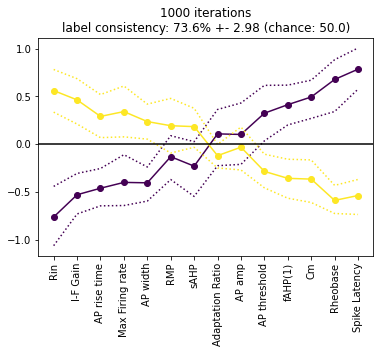

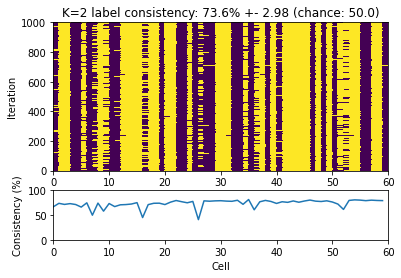

In [ ]:
from pandas.compat.numpy import np_array_datetime64_compat
###########   Cluster Validation #############
from random import sample
from tqdm import tqdm
import scipy
''' random sub sample cluster and plot cluster center similarity '''
SubSampleFrac = .8
num_iter = 1000
center_list = []
label_list = []
sub_sample_ind_list = []
full_label_list = []
k = 2


for ni in tqdm( range(num_iter) ):
    sub_sample_ind = []
    for t in uniq_types:
        t_inds = [i for i in range(len(type_list)) if t in type_list[i]]
        # print(t_inds)
        sub_sample_ind.extend( sample(t_inds, int(len(t_inds)*SubSampleFrac) ) )
    kmeans_iter = KMeans(n_clusters=k, random_state=42).fit(data_for_fit[sub_sample_ind][:,new_cent_order])
    centers_iter = kmeans_iter.cluster_centers_.T
    centers_iter = centers_iter - np.mean(centers_iter,axis=0)
    labels_iter = kmeans_iter.labels_

    # if ni>0:
    #     corco = np.corrcoef(centers_iter.T,center_list[0].T)
    #     if corco[0,-1] > corco[0,-2]:
    #         centers_iter = np.flip(centers_iter, axis=1)
    #         labels_iter=np.logical_not(labels_iter)
    if ni>0:
        corco = np.corrcoef(centers_iter.T,center_list[0].T)
        corco = corco[0:k,k:]
        ind = np.argmax(corco,axis=0) 
        centers_iter = centers_iter[:,ind]
        labels_iter = [ind[l] for l in labels_iter]
    
    full_label_iter = np.empty((data_for_fit.shape[0],))
    full_label_iter[:] = np.nan
    full_label_iter[sub_sample_ind] = labels_iter

    center_list.append(centers_iter)
    label_list.append(labels_iter)
    sub_sample_ind_list.append(sub_sample_ind_list)
    full_label_list.append(full_label_iter)
    
    # delta_centers_iter = abs( np.diff(centers_iter,axis=1))
   
center_stack = np.stack(center_list)
mean_center = np.mean(center_stack,0)
nintey_p_center = np.percentile(center_stack, [2.5, 97.5], axis=0)

cmap = plt.cm.viridis(np.linspace(0,1,k))
fig, ax = plt.subplots(1)
for ki in range(k):
    ax.plot(mean_center[:,ki].T,'-o',color=cmap[ki])
    ax.plot(nintey_p_center[0,:,ki].T,':',color=cmap[ki])
    ax.plot(nintey_p_center[1,:,ki].T,':',color=cmap[ki])


ax.set_xticks(np.arange(len(numericals)))
ax.set_xticklabels(sorted_numericals,rotation=90)
ax.axhline(0, color='k')



full_label_stack = np.stack(full_label_list)

pseudo_truth = scipy.stats.mode(full_label_stack,axis=0)[0]
is_match = full_label_stack == pseudo_truth
consistency_iter = np.mean(is_match, axis = 1)
mean_consistency = np.mean(consistency_iter)
std_consistency = np.std(consistency_iter)
consistency_report = 'label consistency: ' + str(round(mean_consistency*100,1)) + '% +- ' + str(round(std_consistency*100,2)) + ' (chance: ' + str(round(1/k*100,1))+')'
# print(consistency_report)
# print('(chance: ' + str(round(1/k*100,1))+')')
ax.title.set_text( str(ni+1) +' iterations' + '\n' + consistency_report)
plt.show()
fig.savefig('CrossVal_Data k=2 Centers.'+fig_opt['format'],**fig_opt)



fig, ax = plt.subplots(2,1,gridspec_kw={'height_ratios': [3, 1]}  )
ax[0].pcolor( full_label_stack )
ax[0].set_xlabel('Cell')
ax[0].set_ylabel('Iteration')
ax[0].title.set_text('K='+str(k) +' '+ consistency_report)
ax[1].plot(np.mean(is_match,axis=0)*100)
ax[1].set_ylabel('Consistency (%)')
ax[1].set_ylim((0,100))
ax[1].set_xlim((0,is_match.shape[1]))
ax[1].set_xlabel('Cell')
fig.savefig('CrossVal_Data k=2 Labeling.'+fig_opt['format'],**fig_opt)

100%|██████████| 1000/1000 [00:20<00:00, 48.57it/s]


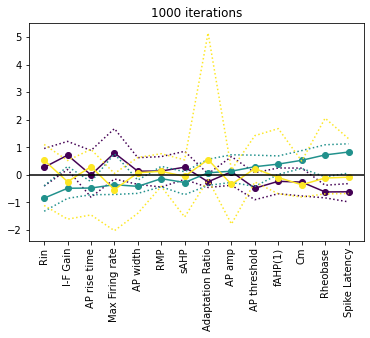

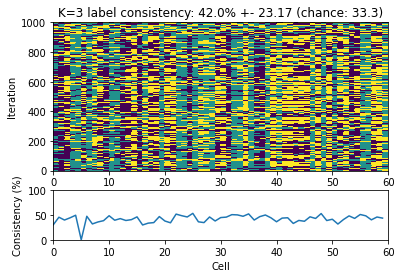

In [ ]:
from pandas.compat.numpy import np_array_datetime64_compat
###########   Cluster Validation #############
from random import sample
from tqdm import tqdm
import scipy
''' random sub sample cluster and plot cluster center similarity '''
SubSampleFrac = .8
num_iter = 1000
center_list = []
label_list = []
sub_sample_ind_list = []
full_label_list = []
k = 3


for ni in tqdm( range(num_iter) ):
    sub_sample_ind = []
    for t in uniq_types:
        t_inds = [i for i in range(len(type_list)) if t in type_list[i]]
        # print(t_inds)
        sub_sample_ind.extend( sample(t_inds, int(len(t_inds)*SubSampleFrac) ) )
    kmeans_iter = KMeans(n_clusters=k, random_state=42).fit(data_for_fit[sub_sample_ind][:,new_cent_order])
    centers_iter = kmeans_iter.cluster_centers_.T
    centers_iter = centers_iter - np.mean(centers_iter,axis=0)
    labels_iter = kmeans_iter.labels_

    if ni>0:
        corco = np.corrcoef(centers_iter.T,center_list[0].T)
        corco = corco[0:k,k:]
        ind = np.argmax(corco,axis=0) 
        centers_iter = centers_iter[:,ind]
        labels_iter = [ind[l] for l in labels_iter]
    
    full_label_iter = np.empty((data_for_fit.shape[0],))
    full_label_iter[:] = np.nan
    full_label_iter[sub_sample_ind] = labels_iter

    center_list.append(centers_iter)
    label_list.append(labels_iter)
    sub_sample_ind_list.append(sub_sample_ind_list)
    full_label_list.append(full_label_iter)
    
    # delta_centers_iter = abs( np.diff(centers_iter,axis=1))
   
center_stack = np.stack(center_list)
mean_center = np.mean(center_stack,0)
nintey_p_center = np.percentile(center_stack, [2.5, 97.5], axis=0)

cmap = plt.cm.viridis(np.linspace(0,1,k))
fig, ax = plt.subplots(1)
for ki in range(k):
    ax.plot(mean_center[:,ki].T,'-o',color=cmap[ki])
    ax.plot(nintey_p_center[0,:,ki].T,':',color=cmap[ki])
    ax.plot(nintey_p_center[1,:,ki].T,':',color=cmap[ki])


ax.set_xticks(np.arange(len(numericals)))
ax.set_xticklabels(sorted_numericals,rotation=90)
ax.axhline(0, color='k')



full_label_stack = np.stack(full_label_list)

pseudo_truth = scipy.stats.mode(full_label_stack,axis=0)[0]
is_match = full_label_stack == pseudo_truth
consistency_iter = np.mean(is_match, axis = 1)
mean_consistency = np.mean(consistency_iter)
std_consistency = np.std(consistency_iter)
consistency_report = 'label consistency: ' + str(round(mean_consistency*100,1)) + '% +- ' + str(round(std_consistency*100,2)) + ' (chance: ' + str(round(1/k*100,1))+')'
# print(consistency_report)
# print('(chance: ' + str(round(1/k*100,1))+')')
ax.title.set_text( str(ni+1) +' iterations' )
plt.show()
fig.savefig('CrossVal_Data k=3 Centers.'+fig_opt['format'],**fig_opt)


fig, ax = plt.subplots(2,1,gridspec_kw={'height_ratios': [3, 1]}  )
ax[0].pcolor( full_label_stack )
ax[0].set_xlabel('Cell')
ax[0].set_ylabel('Iteration')
ax[0].title.set_text('K='+str(k) +' '+ consistency_report)
ax[1].plot(np.mean(is_match,axis=0)*100)
ax[1].set_ylabel('Consistency (%)')
ax[1].set_ylim((0,100))
ax[1].set_xlim((0,is_match.shape[1]))
ax[1].set_xlabel('Cell')
fig.savefig('CrossVal_Data k=3 Labeling.'+fig_opt['format'],**fig_opt)

In [ ]:

import os
from google import colab
for root, dirs, files in os.walk("/content"):
    for f in files:
        if 'sample_data' in root: continue
        if f.endswith(".png"):
             colab.files.download(os.path.join(root, f))
        if f.endswith(".csv"):
             colab.files.download(os.path.join(root, f))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>